# Time Series Analysis study

Studying with Time Series Analysis with Python - Tarek A. Atwan

Data set source: https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/tree/main/datasets

Examples code extracted. Every now and then,modified with my own notes: https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/blob/main/code

In [1]:
# pip install urllib
# pip install modin[dask] 

In [2]:
import pandas as pd
from urllib import request


# CSV File:  Reading a series

Defining index as time series and other columns


In [3]:
#Loading File
URL = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch2/movieboxoffice.csv"

response = request.urlretrieve(URL, r".//Data/ts.csv")

In [4]:
#Reading File
ts_csv = pd.read_csv(r".//Data/ts.csv",
                 header=0,
                parse_dates=['Date'],
                index_col=0,
                infer_datetime_format=True,
                usecols=['Date',
                        'DOW',
                        'Daily',
                        'Forecast',
                        'Percent Diff']
                )


# # When infer_datetime_format=True does not work

# #Format / date parser
# date_parser = lambda x: pd.to_datetime(x,format='%d-%b-%y')
# ts = pd.read_csv(r".//Data/ts.csv",
#                  header=0,
#                 parse_dates=[0],
#                 index_col=0,
#                 date_parser=date_parser,
#                 usecols=['Date',
#                         'DOW',
#                         'Daily',
#                         'Forecast',
#                         'Percent Diff']
#                 )

In [5]:
# ## Chunking (to optimize memory usage) --check pandas error

# from modin.config import Engine
# Engine.put('dask') # Modin will use Dask
# import modin.pandas as pd

# ts_csv = pd.read_csv(r".//Data/ts.csv",
#                  header=0,
#                 parse_dates=[0],
#                 index_col=0,
#                 date_parser=date_parser,
#                 usecols=['Date',
#                         'DOW',
#                         'Daily',
#                         'Forecast',
#                         'Percent Diff']
#                 )

## First look at dataset

In [6]:
display(ts_csv.info(),ts_csv.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


None

,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,"$125,789.89","$235,036.46",-46.48%
2021-04-27,Saturday,"$99,374.01","$197,622.55",-49.72%
2021-04-28,Sunday,"$82,203.16","$116,991.26",-29.74%
2021-04-29,Monday,"$33,530.26","$66,652.65",-49.69%
2021-04-30,Tuesday,"$30,105.24","$34,828.19",-13.56%


In [7]:
# cleaning non-numeric characters ($,.)
clean = lambda x :x.str.replace('[^\d]','',regex=True)
c_df = ts_csv[['Daily','Forecast']].apply(clean,axis=1)
ts_csv[['Daily','Forecast']] = c_df.astype(float)


In [8]:
display(ts_csv.info(),ts_csv.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DOW           128 non-null    object 
 1   Daily         128 non-null    float64
 2   Forecast      128 non-null    float64
 3   Percent Diff  128 non-null    object 
dtypes: float64(2), object(2)
memory usage: 5.0+ KB


None

,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,12578989.0,23503646.0,-46.48%
2021-04-27,Saturday,9937401.0,19762255.0,-49.72%
2021-04-28,Sunday,8220316.0,11699126.0,-29.74%
2021-04-29,Monday,3353026.0,6665265.0,-49.69%
2021-04-30,Tuesday,3010524.0,3482819.0,-13.56%


In [9]:
# deleting variables
del ts_csv

# Persisting (serialization and de-serialization)

In [10]:
# Loading file

URL = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch4/time_series_covid19_confirmed_global.csv"

response = request.urlretrieve(URL, r".//Data/ts2.csv")

#Reading File
ts_csv2 = pd.read_csv(r".//Data/ts2.csv")
ts_csv2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,154487,154585,154712,154757,154800,154960,154960,154960,155072,155093
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,162953,163404,164276,165096,165864,166690,167354,167893,168188,168782
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,201600,201766,201948,202122,202283,202449,202574,202722,202877,203045
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15124,15140,15140,15153,15156,15167,15167,15167,15189,15192
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,52307,52644,52968,53387,53840,54280,54795,55121,55583,56040


In [11]:
#Filtering just USA
df_usa = ts_csv2[ts_csv2['Country/Region']== 'US']

# #Cases from June to end September
df_usa_summer = df_usa.loc[:,'6/1/20':'9/30/20']

df_usa_summer.head()

,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,...,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20
254,1816679,1837948,1857728,1879463,1904375,1925849,1944117,1960815,1978823,2000019,...,6860254,6900324,6939235,6986604,7034971,7079902,7117964,7150631,7194195,7233295


In [12]:
# Wide to Long(Unpivoting)
df_usa_summer_unpivoted = pd.melt(df_usa_summer,
                                 value_vars = df_usa_summer.columns,
                                 value_name = 'cases',
                                 var_name = 'date').set_index('date')
# setting type to index
df_usa_summer_unpivoted.index = pd.to_datetime(df_usa_summer_unpivoted.index)

#looking at data
display(df_usa_summer_unpivoted.info(),df_usa_summer_unpivoted.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-06-01 to 2020-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   122 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


None

,cases
date,
2020-06-01,1816679
2020-06-02,1837948
2020-06-03,1857728
2020-06-04,1879463
2020-06-05,1904375


## Serializing De- Serializing data

In [13]:
#pickle with pandas
df_usa_summer_unpivoted.to_pickle(r".//Data/ts2.pkl")

unpickled_df = pd.read_pickle(r".//Data/ts2.pkl") #default format is set to infer and the extension tells it :it can be, i.e, .pkl.zip...
display(unpickled_df.info(),unpickled_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-06-01 to 2020-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   122 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


None

,cases
date,
2020-06-01,1816679
2020-06-02,1837948
2020-06-03,1857728
2020-06-04,1879463
2020-06-05,1904375


## Pickling a function and its output

In [14]:
def covid_by_country(file,days,country):
    
    ts = pd.read_csv(file)
    ts = ts[ts['Country/Region'] == country]
    final = ts.iloc[:,-days:].sum()
    final.index = pd.to_datetime(final.index)
    return final


<AxesSubplot:title={'center':'COVID confirmed case for US'}, xlabel='Date', ylabel='# of confirmed cases'>

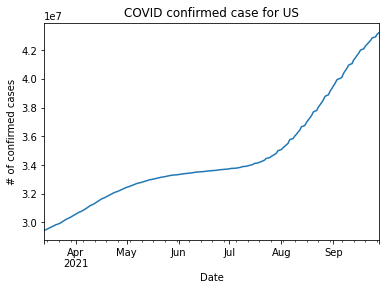

In [15]:
file = r".//Data/ts2.csv"
us_past_120_days = covid_by_country(file,200,'US')

us_past_120_days.plot(title=f'COVID confirmed case for US', xlabel='Date', ylabel='# of confirmed cases')

### Enhancing content (metadata)

In [16]:
# Modified path from original
from pathlib import Path
import pickle
from datetime import datetime
metadata = {
    'date': datetime.now(),
    'data': '''
        COVID-19 Data Repository by the 
        Center for Systems Science and Engineering (CSSE) 
        at Johns Hopkins University'
        ''',
    'author': 'Tarek Atwan',
    'version': 1.0,
    'function': covid_by_country,
    'example' : us_past_120_days
}

output = Path(r'.//Data/covid.pkl')
with open(output, 'wb') as file:
    pickle.dump(metadata, file)

In [17]:
# Deserializing and loading the content
with open(output, 'rb') as file:
    content = pickle.load(file)
content.keys()

dict_keys(['date', 'data', 'author', 'version', 'function', 'example'])

2021-09-24    108227
2021-09-25    108266
2021-09-26    108309
2021-09-27    108344
2021-09-28    108386
dtype: int64

<AxesSubplot:title={'center':'COVID confirmed case for China'}, xlabel='Date', ylabel='# of confirmed cases'>

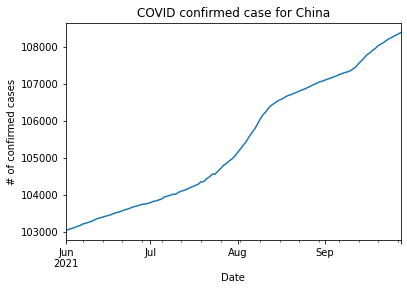

In [18]:
# retrieving and using the function

file = r".//Data/ts2.csv"

new_func = content['function']
df_china = new_func(file, 120, 'China')
display(df_china.tail())
display(df_china.plot(title=f'COVID confirmed case for China', xlabel='Date', ylabel='# of confirmed cases'))

<AxesSubplot:title={'center':'COVID confirmed case for US'}, xlabel='Date', ylabel='# of confirmed cases'>

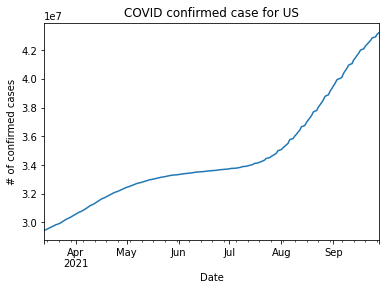

In [19]:
display(content['example'].plot(title=f'COVID confirmed case for US'
                                , xlabel='Date', ylabel='# of confirmed cases'))

## Working with DateTime

In [20]:
import pandas as pd
import numpy as np
import datetime as dt

### Working with DatetimeIndex

In [21]:
dates = ['2021-01-01', # date str format %Y-%m-%d
         '2/1/2021', # date str format %m/%d/%Y
         '03-01-2021', # date  str format %m-%d-%Y
         'April 1, 2021', # date  str format %B %d, %Y
         '20210501', # date str format %Y%m%d
          np.datetime64('2021-07-01'), # numpy datetime64
          dt.datetime(2021, 8, 1), # python datetime
          pd.Timestamp(2021,9,1) # pandas Timestamp
          ]

In [22]:
parsed_dates = pd.to_datetime(
                 dates,
                 infer_datetime_format=True,
                 errors='coerce'
                 )
#Errors
# errors='raise' -> raise an exception
# errors='coerce' -> inserts pd.Nat indicating missing value
# errors='ignore' -> pass the original value

#readable format
print('parsed_dates: ',parsed_dates)

# #readable format, same as :
print('pd.DatetimeIndex: ',pd.DatetimeIndex(dates))

parsed_dates:  DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)
pd.DatetimeIndex:  DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)


In [23]:
display(dt.datetime.strptime('1/1/2022', '%m/%d/%Y'))
print(dt.datetime.strptime('1/1/2022', '%m/%d/%Y'),'\n')

display(dt.datetime.strptime('1 January, 2022', '%d %B, %Y').date())
print(dt.datetime.strptime('1 January, 2022', '%d %B, %Y').date(),'\n')

display(pd.to_datetime('1/1/2022', format='%m/%d/%Y'))
print(pd.to_datetime('1/1/2022', format='%m/%d/%Y'),'\n')

display(pd.to_datetime('1 January, 2022', format='%d %B, %Y'))
print(pd.to_datetime('1 January, 2022', format='%d %B, %Y'))

datetime.datetime(2022, 1, 1, 0, 0)

2022-01-01 00:00:00 



datetime.date(2022, 1, 1)

2022-01-01 



Timestamp('2022-01-01 00:00:00')

2022-01-01 00:00:00 



Timestamp('2022-01-01 00:00:00')

2022-01-01 00:00:00


#### Functions to extract information

In [24]:
print(f'Name of Day : {parsed_dates.day_name()}')
print(f'Month : {parsed_dates.month}')
print(f'Year : {parsed_dates.year}')
print(f'Days in Month : {parsed_dates.days_in_month}')
print(f'Quarter {parsed_dates.quarter}')
print(f'Quarter Start : {parsed_dates.is_quarter_start}')
print(f'Leap Year : {parsed_dates.is_leap_year}')
print(f'Month Start : {parsed_dates.is_month_start}')
print(f'Month End : {parsed_dates.is_month_end}')
print(f'Year Start : {parsed_dates.is_year_start}')

Name of Day : Index(['Friday', 'Monday', 'Monday', 'Thursday', 'Saturday', 'Thursday',
       'Sunday', 'Wednesday'],
      dtype='object')
Month : Int64Index([1, 2, 3, 4, 5, 7, 8, 9], dtype='int64')
Year : Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021], dtype='int64')
Days in Month : Int64Index([31, 28, 31, 30, 31, 31, 31, 30], dtype='int64')
Quarter Int64Index([1, 1, 1, 2, 2, 3, 3, 3], dtype='int64')
Quarter Start : [ True False False  True False  True False False]
Leap Year : [False False False False False False False False]
Month Start : [ True  True  True  True  True  True  True  True]
Month End : [False False False False False False False False]
Year Start : [ True False False False False False False False]


#### Generating a DatetimeIndex

In [25]:
# Start, End, periods, freq

print(pd.date_range(start='2021-01-01', 
              periods=3, 
              freq='D'),'\n')

print(pd.date_range(start='2021-02-01',
               end='2021-02-03',
               freq='D'),'\n')

print(pd.date_range(start='2021-03-01',
               periods=3),'\n')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D') 

DatetimeIndex(['2021-02-01', '2021-02-02', '2021-02-03'], dtype='datetime64[ns]', freq='D') 

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03'], dtype='datetime64[ns]', freq='D') 



### Working with Unix epoch timestamps

Unix-based timestamp reference point:
**January 1,1970 00:00:00 UTC**

In [26]:
import time
print(time.time())

1670510826.8944402


#### Select seconds!!!

https://www.epoch101.com/

In [27]:
pd.to_datetime(1669671078.9886131,unit='s')
#Given in GMT

Timestamp('2022-11-28 21:31:18.988613120')

In [28]:
#Time Zone aware

t = pd.to_datetime(1669671078.9886131,unit='s')

t.tz_localize('UTC').tz_convert('EST')

Timestamp('2022-11-28 16:31:18.988613120-0500', tz='EST')

In [29]:
df = pd.DataFrame(
        {'unix_epoch': [1641110340,  1641196740, 1641283140, 1641369540],
                'Sales': [23000, 19020, 21000, 17030]}
                )
df

,unix_epoch,Sales
0,1641110340,23000
1,1641196740,19020
2,1641283140,21000
3,1641369540,17030


In [30]:
# datetime in GMT
df['Date'] = pd.to_datetime(df['unix_epoch'], unit='s')

#Localizing (UTC and then adjusting to US/Pacific)
df['Date'] = df['Date'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')

#Setting as Index
df.set_index('Date', inplace=True)

df

,unix_epoch,Sales
Date,,
2022-01-01 23:59:00-08:00,1641110340,23000
2022-01-02 23:59:00-08:00,1641196740,19020
2022-01-03 23:59:00-08:00,1641283140,21000
2022-01-04 23:59:00-08:00,1641369540,17030


#### Converting a datetime to UnIx epoch
Other source: https://pandas.pydata.org/pandas-docs/version/0.20/timeseries.html

In [31]:
df = pd.DataFrame(
        {'Date': pd.date_range('01-01-2022', periods=5),
        'order' : range(5)}
                 )
df

,Date,order
0,2022-01-01,0
1,2022-01-02,1
2,2022-01-03,2
3,2022-01-04,3
4,2022-01-05,4


In [32]:
example = df
example['Date_POSIX']= (df['Date'] -  pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")
example

,Date,order,Date_POSIX
0,2022-01-01,0,1640995200
1,2022-01-02,1,1641081600
2,2022-01-03,2,1641168000
3,2022-01-04,3,1641254400
4,2022-01-05,4,1641340800


In [33]:
pd.Timedelta("1s")

Timedelta('0 days 00:00:01')

### Working with time deltas

Performing calculations

In [34]:
df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5', 'item6'],
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D', tz='UTC')
        }
)
df

,item,purchase_dt
0,item1,2021-01-01 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00


In [35]:
#Expiration date for returning item occurs 30 days after purchase
df['expiration_dt'] = df['purchase_dt'] + pd.Timedelta(days=30)
df

,item,purchase_dt,expiration_dt
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00


In [36]:
df['extended_dt'] = df['purchase_dt'] +\
                pd.Timedelta('35 days 12 hours 30 minutes')
df

,item,purchase_dt,expiration_dt,extended_dt
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,2021-02-05 12:30:00+00:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00,2021-02-06 12:30:00+00:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00,2021-02-07 12:30:00+00:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00,2021-02-08 12:30:00+00:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00,2021-02-09 12:30:00+00:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00,2021-02-10 12:30:00+00:00


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   item           6 non-null      object             
 1   purchase_dt    6 non-null      datetime64[ns, UTC]
 2   expiration_dt  6 non-null      datetime64[ns, UTC]
 3   extended_dt    6 non-null      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](3), object(1)
memory usage: 320.0+ bytes


In [38]:
# Converting datetimew frrom UTC to US/Pacific
df.iloc[:,1:] = df.iloc[: ,1:].apply(lambda x: x.dt.tz_convert('US/Pacific'))
df

C:\Users\anacl\AppData\Local\Temp/ipykernel_17772/3093954286.py:2: FutureWarning: Setitem-like behavior with mismatched timezones is deprecated and will change in a future version. Instead of raising (or for Index, Series, and DataFrame methods, coercing to object dtype), the value being set (or passed as a fill_value, or inserted) will be cast to the existing DatetimeArray/DatetimeIndex/Series/DataFrame column's timezone. To retain the old behavior, explicitly cast to object dtype before the operation.
  df.iloc[:,1:] = df.iloc[: ,1:].apply(lambda x: x.dt.tz_convert('US/Pacific'))


,item,purchase_dt,expiration_dt,extended_dt
0,item1,2020-12-31 16:00:00-08:00,2021-01-30 16:00:00-08:00,2021-02-05 04:30:00-08:00
1,item2,2021-01-01 16:00:00-08:00,2021-01-31 16:00:00-08:00,2021-02-06 04:30:00-08:00
2,item3,2021-01-02 16:00:00-08:00,2021-02-01 16:00:00-08:00,2021-02-07 04:30:00-08:00
3,item4,2021-01-03 16:00:00-08:00,2021-02-02 16:00:00-08:00,2021-02-08 04:30:00-08:00
4,item5,2021-01-04 16:00:00-08:00,2021-02-03 16:00:00-08:00,2021-02-09 04:30:00-08:00
5,item6,2021-01-05 16:00:00-08:00,2021-02-04 16:00:00-08:00,2021-02-10 04:30:00-08:00


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype                     
---  ------         --------------  -----                     
 0   item           6 non-null      object                    
 1   purchase_dt    6 non-null      datetime64[ns, US/Pacific]
 2   expiration_dt  6 non-null      datetime64[ns, US/Pacific]
 3   extended_dt    6 non-null      datetime64[ns, US/Pacific]
dtypes: datetime64[ns, US/Pacific](3), object(1)
memory usage: 320.0+ bytes


In [40]:
df['exp_ext_diff'] = (
         df['extended_dt'] - df['expiration_dt']
        )
df

,item,purchase_dt,expiration_dt,extended_dt,exp_ext_diff
0,item1,2020-12-31 16:00:00-08:00,2021-01-30 16:00:00-08:00,2021-02-05 04:30:00-08:00,5 days 12:30:00
1,item2,2021-01-01 16:00:00-08:00,2021-01-31 16:00:00-08:00,2021-02-06 04:30:00-08:00,5 days 12:30:00
2,item3,2021-01-02 16:00:00-08:00,2021-02-01 16:00:00-08:00,2021-02-07 04:30:00-08:00,5 days 12:30:00
3,item4,2021-01-03 16:00:00-08:00,2021-02-02 16:00:00-08:00,2021-02-08 04:30:00-08:00,5 days 12:30:00
4,item5,2021-01-04 16:00:00-08:00,2021-02-03 16:00:00-08:00,2021-02-09 04:30:00-08:00,5 days 12:30:00
5,item6,2021-01-05 16:00:00-08:00,2021-02-04 16:00:00-08:00,2021-02-10 04:30:00-08:00,5 days 12:30:00


In [41]:
tds = pd.to_timedelta(['1 day', '5 days', '10 days 6 hours'])
tds

TimedeltaIndex(['1 days 00:00:00', '5 days 00:00:00', '10 days 06:00:00'], dtype='timedelta64[ns]', freq=None)

In [42]:
df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5', 'item6'],
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D', tz='UTC')
        }
)
df

,item,purchase_dt
0,item1,2021-01-01 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00


In [43]:
df['1 week'] = pd.Timedelta('1W')
df

,item,purchase_dt,1 week
0,item1,2021-01-01 00:00:00+00:00,7 days
1,item2,2021-01-02 00:00:00+00:00,7 days
2,item3,2021-01-03 00:00:00+00:00,7 days
3,item4,2021-01-04 00:00:00+00:00,7 days
4,item5,2021-01-05 00:00:00+00:00,7 days
5,item6,2021-01-06 00:00:00+00:00,7 days


In [44]:
df['1_week_more'] = df['purchase_dt'] + df['1 week']
df['1_week_less'] = df['purchase_dt'] - df['1 week']
df

,item,purchase_dt,1 week,1_week_more,1_week_less
0,item1,2021-01-01 00:00:00+00:00,7 days,2021-01-08 00:00:00+00:00,2020-12-25 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,7 days,2021-01-09 00:00:00+00:00,2020-12-26 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,7 days,2021-01-10 00:00:00+00:00,2020-12-27 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,7 days,2021-01-11 00:00:00+00:00,2020-12-28 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,7 days,2021-01-12 00:00:00+00:00,2020-12-29 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00,7 days,2021-01-13 00:00:00+00:00,2020-12-30 00:00:00+00:00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   item         6 non-null      object             
 1   purchase_dt  6 non-null      datetime64[ns, UTC]
 2   1 week       6 non-null      timedelta64[ns]    
 3   1_week_more  6 non-null      datetime64[ns, UTC]
 4   1_week_less  6 non-null      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](3), object(1), timedelta64[ns](1)
memory usage: 368.0+ bytes


timedelta allows calculations and timedelta_range works in a similar fashion to date-range:

In [46]:
df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5'],
        'purchase_dt': pd.date_range('2021-01-01', periods=5, freq='D', tz='UTC'),
        'time_deltas': pd.timedelta_range('1W 2 days 6 hours', periods=5)
        }

)
df

,item,purchase_dt,time_deltas
0,item1,2021-01-01 00:00:00+00:00,9 days 06:00:00
1,item2,2021-01-02 00:00:00+00:00,10 days 06:00:00
2,item3,2021-01-03 00:00:00+00:00,11 days 06:00:00
3,item4,2021-01-04 00:00:00+00:00,12 days 06:00:00
4,item5,2021-01-05 00:00:00+00:00,13 days 06:00:00


### Converting Datetime / Time Zone info

References: https://en.wikipedia.org/wiki/List_of_tz_database_time_zones


In [47]:
df = pd.DataFrame(
        {       
        'Location': ['Los Angeles', 
                     'New York',
                     'Berlin', 
                     'New Delhi', 
                     'Moscow', 
                     'Tokyo', 
                     'Dubai'],
        'tz': ['US/Pacific', 
               'US/Eastern', 
               'Europe/Berlin', 
               'Asia/Kolkata', 
               'Europe/Moscow', 
               'Asia/Tokyo',
               'Asia/Dubai'],
        'visit_dt': pd.date_range(start='22:00',periods=7, freq='45min'),
        }).set_index('visit_dt')
df

,Location,tz
visit_dt,,
2022-12-08 22:00:00,Los Angeles,US/Pacific
2022-12-08 22:45:00,New York,US/Eastern
2022-12-08 23:30:00,Berlin,Europe/Berlin
2022-12-09 00:15:00,New Delhi,Asia/Kolkata
2022-12-09 01:00:00,Moscow,Europe/Moscow
2022-12-09 01:45:00,Tokyo,Asia/Tokyo
2022-12-09 02:30:00,Dubai,Asia/Dubai


In [48]:
# adding local time
#localizing
df = df.tz_localize('UTC')
# adding localized time to new columns
df['local_dt'] = df.index
#converting to local time zone
df['local_dt'] = df.apply(lambda x: pd.Timestamp.tz_convert(x['local_dt'], x['tz']), axis=1)
df

,Location,tz,local_dt
visit_dt,,,
2022-12-08 22:00:00+00:00,Los Angeles,US/Pacific,2022-12-08 14:00:00-08:00
2022-12-08 22:45:00+00:00,New York,US/Eastern,2022-12-08 17:45:00-05:00
2022-12-08 23:30:00+00:00,Berlin,Europe/Berlin,2022-12-09 00:30:00+01:00
2022-12-09 00:15:00+00:00,New Delhi,Asia/Kolkata,2022-12-09 05:45:00+05:30
2022-12-09 01:00:00+00:00,Moscow,Europe/Moscow,2022-12-09 04:00:00+03:00
2022-12-09 01:45:00+00:00,Tokyo,Asia/Tokyo,2022-12-09 10:45:00+09:00
2022-12-09 02:30:00+00:00,Dubai,Asia/Dubai,2022-12-09 06:30:00+04:00


In [49]:
# How to make sense if it's morning or night if hour is not 24h format?
# Set the format using strftime
df.index = df.index.strftime('%Y-%m-%d %H:%M %p')
df

,Location,tz,local_dt
visit_dt,,,
2022-12-08 22:00 PM,Los Angeles,US/Pacific,2022-12-08 14:00:00-08:00
2022-12-08 22:45 PM,New York,US/Eastern,2022-12-08 17:45:00-05:00
2022-12-08 23:30 PM,Berlin,Europe/Berlin,2022-12-09 00:30:00+01:00
2022-12-09 00:15 AM,New Delhi,Asia/Kolkata,2022-12-09 05:45:00+05:30
2022-12-09 01:00 AM,Moscow,Europe/Moscow,2022-12-09 04:00:00+03:00
2022-12-09 01:45 AM,Tokyo,Asia/Tokyo,2022-12-09 10:45:00+09:00
2022-12-09 02:30 AM,Dubai,Asia/Dubai,2022-12-09 06:30:00+04:00


### Working with date offsets

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [50]:
np.random.seed(10)
df = pd.DataFrame(
        {       
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
        'production' : np.random.randint(4, 20, 6)
        }).set_index('purchase_dt')
df['day'] = df.index.day_name()
df

,production,day
purchase_dt,,
2021-01-01,13,Friday
2021-01-02,17,Saturday
2021-01-03,8,Sunday
2021-01-04,19,Monday
2021-01-05,4,Tuesday
2021-01-06,5,Wednesday


In [51]:
df.reset_index().groupby(['purchase_dt', 'day']).sum()

,,production
purchase_dt,day,
2021-01-01,Friday,13
2021-01-02,Saturday,17
2021-01-03,Sunday,8
2021-01-04,Monday,19
2021-01-05,Tuesday,4
2021-01-06,Wednesday,5


#### Business days
https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.BusinessDay.html#pandas.tseries.offsets.BusinessDay

In [52]:
display(type(pd.offsets.BDay(0)))


df['BusinessDay'] = df.index - pd.offsets.BDay(1)
df['BDay Name'] = df['BusinessDay'].dt.day_name()
df



pandas._libs.tslibs.offsets.BusinessDay

,production,day,BusinessDay,BDay Name
purchase_dt,,,,
2021-01-01,13,Friday,2020-12-31,Thursday
2021-01-02,17,Saturday,2021-01-01,Friday
2021-01-03,8,Sunday,2021-01-01,Friday
2021-01-04,19,Monday,2021-01-01,Friday
2021-01-05,4,Tuesday,2021-01-04,Monday
2021-01-06,5,Wednesday,2021-01-05,Tuesday


In [53]:
df['BusinessDay'] = df.index - pd.offsets.BDay(1)
df['BDay Name'] = df['BusinessDay'].dt.day_name()
df

,production,day,BusinessDay,BDay Name
purchase_dt,,,,
2021-01-01,13,Friday,2020-12-31,Thursday
2021-01-02,17,Saturday,2021-01-01,Friday
2021-01-03,8,Sunday,2021-01-01,Friday
2021-01-04,19,Monday,2021-01-01,Friday
2021-01-05,4,Tuesday,2021-01-04,Monday
2021-01-06,5,Wednesday,2021-01-05,Tuesday


,,production
BusinessDay,BDay Name,
2020-12-31,Thursday,13
2021-01-01,Friday,44
2021-01-04,Monday,4
2021-01-05,Tuesday,5


<AxesSubplot:xlabel='BusinessDay,BDay Name'>

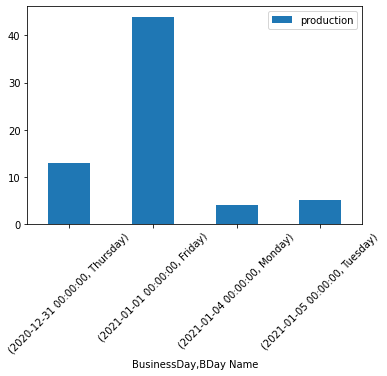

In [54]:
display(df.groupby(['BusinessDay', 'BDay Name']).sum(numeric_only=True))
display(df.groupby(['BusinessDay', 'BDay Name']).sum(numeric_only=True).plot.bar(rot=45))


In [55]:
np.random.seed(10)
df = pd.DataFrame(
        {       
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
        'production' : np.random.randint(4, 20, 6)
        }).set_index('purchase_dt')
df

,production
purchase_dt,
2021-01-01,13
2021-01-02,17
2021-01-03,8
2021-01-04,19
2021-01-05,4
2021-01-06,5


In [56]:
df['BusinessDay'] = df.index + pd.offsets.BDay(0)
df['MonthEnd'] = df.index + pd.offsets.MonthEnd(0)
df['QuarterEnd'] = df.index + pd.offsets.QuarterEnd(0)
#df['BDay Name'] = df['BusinessDay'].dt.day_name()
df



,production,BusinessDay,MonthEnd,QuarterEnd
purchase_dt,,,,
2021-01-01,13,2021-01-01,2021-01-31,2021-03-31
2021-01-02,17,2021-01-04,2021-01-31,2021-03-31
2021-01-03,8,2021-01-04,2021-01-31,2021-03-31
2021-01-04,19,2021-01-04,2021-01-31,2021-03-31
2021-01-05,4,2021-01-05,2021-01-31,2021-03-31
2021-01-06,5,2021-01-06,2021-01-31,2021-03-31


#### Holidays

2 approaches: Existing calendar and Custom calendar

https://github.com/pandas-dev/pandas/blob/main/pandas/tseries/holiday.py

In [57]:
from pandas.tseries.holiday import ( USFederalHolidayCalendar)

df = pd.DataFrame(
        {       
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
        'production' : np.random.randint(4, 50,6)
        }).set_index('purchase_dt')
df

,production
purchase_dt,
2021-01-01,32
2021-01-02,29
2021-01-03,33
2021-01-04,33
2021-01-05,12
2021-01-06,13


In [58]:
#Existing calendar
USFederalHolidayCalendar.rules

[Holiday: New Year's Day (month=1, day=1, observance=<function nearest_workday at 0x000002402D8A33A0>),
 Holiday: Birthday of Martin Luther King, Jr. (month=1, day=1, offset=<DateOffset: weekday=MO(+3)>),
 Holiday: Washington’s Birthday (month=2, day=1, offset=<DateOffset: weekday=MO(+3)>),
 Holiday: Memorial Day (month=5, day=31, offset=<DateOffset: weekday=MO(-1)>),
 Holiday: Juneteenth National Independence Day (month=6, day=19, observance=<function nearest_workday at 0x000002402D8A33A0>),
 Holiday: Independence Day (month=7, day=4, observance=<function nearest_workday at 0x000002402D8A33A0>),
 Holiday: Labor Day (month=9, day=1, offset=<DateOffset: weekday=MO(+1)>),
 Holiday: Columbus Day (month=10, day=1, offset=<DateOffset: weekday=MO(+2)>),
 Holiday: Veterans Day (month=11, day=11, observance=<function nearest_workday at 0x000002402D8A33A0>),
 Holiday: Thanksgiving Day (month=11, day=1, offset=<DateOffset: weekday=TH(+4)>),
 Holiday: Christmas Day (month=12, day=25, observance=<

In [59]:
df['USFederalHolidays'] = df.index + pd.offsets.CDay(calendar=USFederalHolidayCalendar())
df

C:\Users\anacl\AppData\Local\Temp/ipykernel_17772/1250763200.py:1: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  df['USFederalHolidays'] = df.index + pd.offsets.CDay(calendar=USFederalHolidayCalendar())


,production,USFederalHolidays
purchase_dt,,
2021-01-01,32,2021-01-04
2021-01-02,29,2021-01-04
2021-01-03,33,2021-01-04
2021-01-04,33,2021-01-05
2021-01-05,12,2021-01-06
2021-01-06,13,2021-01-07


In [60]:
#No warning and better performance for large datasets
df['date'] = df.index
df['USFederalHolidays1'] = df.apply(lambda x: x.date + pd.offsets.CDay(calendar=USFederalHolidayCalendar(x.date)), axis=1)
df

,production,USFederalHolidays,date,USFederalHolidays1
purchase_dt,,,,
2021-01-01,32,2021-01-04,2021-01-01,2021-01-04
2021-01-02,29,2021-01-04,2021-01-02,2021-01-04
2021-01-03,33,2021-01-04,2021-01-03,2021-01-04
2021-01-04,33,2021-01-05,2021-01-04,2021-01-05
2021-01-05,12,2021-01-06,2021-01-05,2021-01-06
2021-01-06,13,2021-01-07,2021-01-06,2021-01-07


In [61]:
# Custom calendar
from pandas.tseries.holiday import (
    Holiday,
    nearest_workday
)

newyears = Holiday("New Years", 
                   month=1, 
                   day=1, 
                   observance=nearest_workday)
# nearest_workday ->uses the day before if it falls on saturday and the day after, if it falls on sunday
newyears

Holiday: New Years (month=1, day=1, observance=<function nearest_workday at 0x000002402D8A33A0>)

In [62]:
df['NewYearsHoliday'] = df.index + pd.offsets.CDay(calendar=newyears)
df

C:\Users\anacl\AppData\Local\Temp/ipykernel_17772/4284071160.py:1: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  df['NewYearsHoliday'] = df.index + pd.offsets.CDay(calendar=newyears)


,production,USFederalHolidays,date,USFederalHolidays1,NewYearsHoliday
purchase_dt,,,,,
2021-01-01,32,2021-01-04,2021-01-01,2021-01-04,2021-01-04
2021-01-02,29,2021-01-04,2021-01-02,2021-01-04,2021-01-04
2021-01-03,33,2021-01-04,2021-01-03,2021-01-04,2021-01-04
2021-01-04,33,2021-01-05,2021-01-04,2021-01-05,2021-01-05
2021-01-05,12,2021-01-06,2021-01-05,2021-01-06,2021-01-06
2021-01-06,13,2021-01-07,2021-01-06,2021-01-07,2021-01-07


In [63]:
#No warning and better performance for large datasets
df['date'] = df.index
df['NewYearsHoliday1'] = df.apply(lambda x: x.date + pd.offsets.CDay(calendar=newyears), axis=1)
df

,production,USFederalHolidays,date,USFederalHolidays1,NewYearsHoliday,NewYearsHoliday1
purchase_dt,,,,,,
2021-01-01,32,2021-01-04,2021-01-01,2021-01-04,2021-01-04,2021-01-04
2021-01-02,29,2021-01-04,2021-01-02,2021-01-04,2021-01-04,2021-01-04
2021-01-03,33,2021-01-04,2021-01-03,2021-01-04,2021-01-04,2021-01-04
2021-01-04,33,2021-01-05,2021-01-04,2021-01-05,2021-01-05,2021-01-05
2021-01-05,12,2021-01-06,2021-01-05,2021-01-06,2021-01-06,2021-01-06
2021-01-06,13,2021-01-07,2021-01-06,2021-01-07,2021-01-07,2021-01-07


#### Custom Business days

In [64]:
#Defining business weekdays and national holiday

#Workdays
dubai_uae_workdays = "Sun Mon Tue Wed Thu"

# UAE national day
nationalDay = [pd.to_datetime('2021-12-2')]

#applying biz weekdays and holiday to custom calendar
dubai_uae_bday = pd.offsets.CDay(
    holidays=nationalDay,
    weekmask=dubai_uae_workdays,
)


dubai_uae_bday

<CustomBusinessDay>

In [65]:
# Using new calendar
df = pd.DataFrame({'Date': pd.date_range('12-1-2021', periods=10, freq=dubai_uae_bday )})
df['Day_name'] = df.Date.dt.day_name()

df

,Date,Day_name
0,2021-12-01,Wednesday
1,2021-12-05,Sunday
2,2021-12-06,Monday
3,2021-12-07,Tuesday
4,2021-12-08,Wednesday
5,2021-12-09,Thursday
6,2021-12-12,Sunday
7,2021-12-13,Monday
8,2021-12-14,Tuesday
9,2021-12-15,Wednesday


#### Custom Business Hours

In [66]:
cust_hours = pd.offsets.CustomBusinessHour(
    start="8:30",
    end="15:30",
    holidays=nationalDay,
    weekmask=dubai_uae_workdays)
df['BHours'] = df['Date'] + cust_hours
df

C:\Users\anacl\AppData\Local\Temp/ipykernel_17772/1180383970.py:6: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  df['BHours'] = df['Date'] + cust_hours


,Date,Day_name,BHours
0,2021-12-01,Wednesday,2021-12-01 09:30:00
1,2021-12-05,Sunday,2021-12-05 09:30:00
2,2021-12-06,Monday,2021-12-06 09:30:00
3,2021-12-07,Tuesday,2021-12-07 09:30:00
4,2021-12-08,Wednesday,2021-12-08 09:30:00
5,2021-12-09,Thursday,2021-12-09 09:30:00
6,2021-12-12,Sunday,2021-12-12 09:30:00
7,2021-12-13,Monday,2021-12-13 09:30:00
8,2021-12-14,Tuesday,2021-12-14 09:30:00
9,2021-12-15,Wednesday,2021-12-15 09:30:00


In [67]:
#No warning and better performance for large datasets
df['BHours1'] = df.apply(lambda x: x.Date + cust_hours, axis=1)
df

,Date,Day_name,BHours,BHours1
0,2021-12-01,Wednesday,2021-12-01 09:30:00,2021-12-01 09:30:00
1,2021-12-05,Sunday,2021-12-05 09:30:00,2021-12-05 09:30:00
2,2021-12-06,Monday,2021-12-06 09:30:00,2021-12-06 09:30:00
3,2021-12-07,Tuesday,2021-12-07 09:30:00,2021-12-07 09:30:00
4,2021-12-08,Wednesday,2021-12-08 09:30:00,2021-12-08 09:30:00
5,2021-12-09,Thursday,2021-12-09 09:30:00,2021-12-09 09:30:00
6,2021-12-12,Sunday,2021-12-12 09:30:00,2021-12-12 09:30:00
7,2021-12-13,Monday,2021-12-13 09:30:00,2021-12-13 09:30:00
8,2021-12-14,Tuesday,2021-12-14 09:30:00,2021-12-14 09:30:00
9,2021-12-15,Wednesday,2021-12-15 09:30:00,2021-12-15 09:30:00


## Handling Missing Data

Just as any other datasets, time series datasets have outliers and missing data.
Chacking with business and system admininstrators for encoded missing values and their meaning and consequence for business is crucial. 

In [68]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np



import matplotlib
import sklearn
import statsmodels as sm

Functions

In [69]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [70]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()

In [71]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

#### Loading data

In [72]:
URL1 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/co2_missing.csv"
response = request.urlretrieve(URL1, r".//Data/co2_missing.csv")
co2 = Path(r".//Data/co2_missing.csv")
co2_df = pd.read_csv(co2)

URL2 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/clicks_missing_multiple.csv"
response = request.urlretrieve(URL2, r".//Data/clicks_missing_multiple.csv")
ecom = Path(r".//Data/clicks_missing_multiple.csv")
ecom_df = pd.read_csv(ecom, parse_dates=['date'])

In [73]:
display(co2_df.head(),co2_df.columns)
display(ecom_df.head(),ecom_df.columns)

,year,co2
0,1750,0.0125
1,1760,0.0128
2,1770,0.0150
3,1780,0.0169
4,1790,0.0206


Index(['year', 'co2'], dtype='object')

,date,price,location,clicks
0,2008-04-01,43.155647,2.0,18784
1,2008-04-02,43.079056,1.0,24738
2,NaT,43.842609,NaN,15209
3,NaT,NaN,1.0,14018
4,NaT,43.941176,1.0,11974


Index(['date', 'price', 'location', 'clicks'], dtype='object')

#### Data Quality Checks

In [74]:
# isnull() isna()and sum(): 
display('Missing per columns: ',co2_df.isnull().sum())
display('Missing per columns: ',ecom_df.isnull().sum())
display('Total Missings: ',ecom_df.isnull().sum().sum())

'Missing per columns: '

year     0
co2     25
dtype: int64

'Missing per columns: '

date         4
price        1
location     1
clicks      14
dtype: int64

'Total Missings: '

20

In [75]:
#pd.read_csv and keep_default_na = False
co2_df1 = pd.read_csv(co2,keep_default_na=False)
display('Missing per columns: ',co2_df1.isnull().sum())
display(co2_df1.iloc[132:139])

co2_df1 = pd.read_csv(co2,keep_default_na=True)
display('Missing per columns: ',co2_df1.isnull().sum())
display(co2_df1.iloc[132:139])

'Missing per columns: '

year    0
co2     0
dtype: int64

,year,co2
132,1927,
133,1928,
134,1929,
135,1930,
136,1931,
137,1932,
138,1933,


'Missing per columns: '

year     0
co2     25
dtype: int64

,year,co2
132,1927,NaN
133,1928,NaN
134,1929,NaN
135,1930,NaN
136,1931,NaN
137,1932,NaN
138,1933,NaN


In [76]:
#pd.read_csv and na_values = {}
ecom_df1 = pd.read_csv(ecom)
display('Missing per columns: ',ecom_df1.isnull().sum())
display(ecom_df1.describe(include='all'))

ecom_df1 = pd.read_csv(ecom,na_values={'?'})
display('Missing per columns: ',ecom_df1.isnull().sum())
display(ecom_df1.describe(include='all'))

'Missing per columns: '

date         4
price        1
location     1
clicks      14
dtype: int64

,date,price,location,clicks
count,131,134.000000,134.000000,121
unique,131,NaN,NaN,119
top,4/1/08,NaN,NaN,?
freq,1,NaN,NaN,2
mean,NaN,43.480221,1.694030,NaN
std,NaN,0.610578,1.118724,NaN
min,NaN,42.207018,1.000000,NaN
25%,NaN,43.038050,1.000000,NaN
50%,NaN,43.498842,1.000000,NaN
75%,NaN,43.889935,2.000000,NaN


'Missing per columns: '

date         4
price        1
location     1
clicks      16
dtype: int64

,date,price,location,clicks
count,131,134.000000,134.000000,119.000000
unique,131,NaN,NaN,NaN
top,4/1/08,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,43.480221,1.694030,9530.336134
std,NaN,0.610578,1.118724,4687.587507
min,NaN,42.207018,1.000000,2044.000000
25%,NaN,43.038050,1.000000,6438.000000
50%,NaN,43.498842,1.000000,8391.000000
75%,NaN,43.889935,2.000000,11363.500000


In [77]:
del co2_df,co2_df1,ecom_df,ecom_df1,co2,ecom

### Handling Missing Data with univariate imputation using pandas

In [78]:
#Loading Data

URL1 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/co2_original.csv"
response = request.urlretrieve(URL1, r".//Data/co2_original.csv")
co2_or = Path(r".//Data/co2_original.csv")
co2_original = pd.read_csv(co2_or)

URL2 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/co2_missing_only.csv"
response = request.urlretrieve(URL2, r".//Data/co2_missing_only.csv")
co2_mis = Path(r".//Data/co2_missing_only.csv")
co2_missing = pd.read_csv(co2_mis)

URL3 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/clicks_original.csv"
response = request.urlretrieve(URL3, r".//Data/clicks_original.csv")
clicks_or= Path(r".//Data/clicks_original.csv")
clicks_original = pd.read_csv(clicks_or)

URL4 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/clicks_missing.csv"
response = request.urlretrieve(URL4, r".//Data/clicks_missing.csv")
clicks_mis= Path(r".//Data/clicks_missing.csv")
clicks_missing = pd.read_csv(clicks_mis)

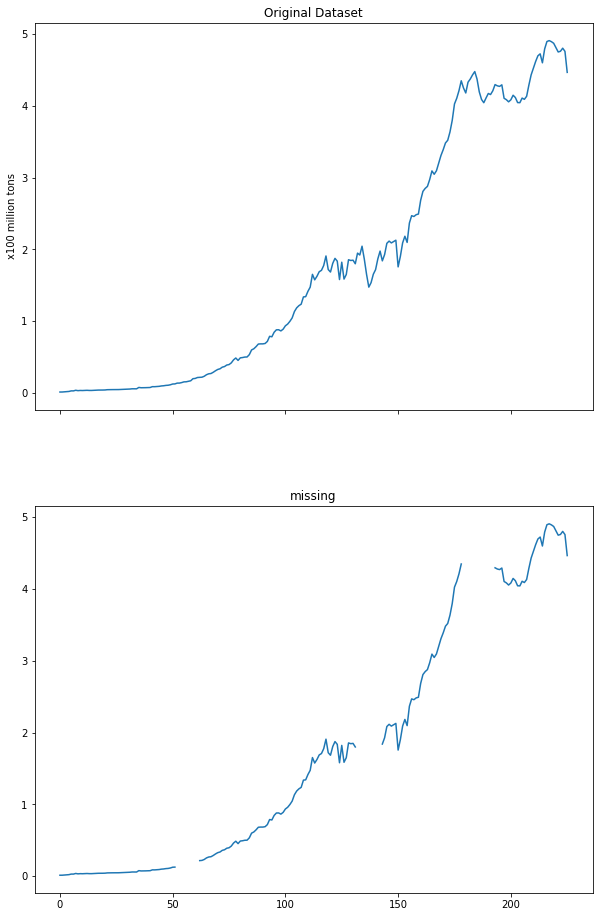

In [79]:
plot_dfs(co2_original, 
         co2_missing, 
         'co2',
         title="Annual CO2 Emission per Capita",
         xlabel="Years",
         ylabel="x100 million tons")



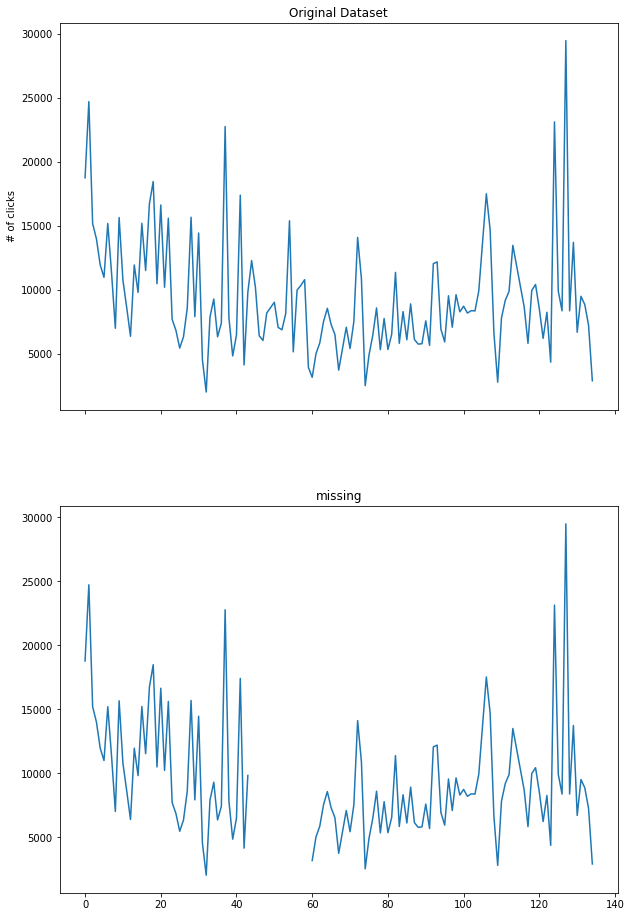

In [80]:
plot_dfs(clicks_original, 
         clicks_missing, 
         'clicks',
         title="Page Clicks per Day",
         xlabel="date",
         ylabel="# of clicks")

In [81]:
co2_missing['ffill'] = co2_missing['co2'].fillna(method='ffill')
co2_missing['bfill'] = co2_missing['co2'].fillna(method='bfill')
co2_missing['mean'] = co2_missing['co2'].fillna(co2_missing['co2'].mean())

In [82]:
co2_missing.head()

,year,co2,ffill,bfill,mean
0,1750,0.0125,0.0125,0.0125,0.0125
1,1760,0.0128,0.0128,0.0128,0.0128
2,1770,0.0150,0.0150,0.0150,0.0150
3,1780,0.0169,0.0169,0.0169,0.0169
4,1790,0.0206,0.0206,0.0206,0.0206


In [83]:
_ = rmse_score(co2_original, 
                    co2_missing, 
                    'co2')

RMSE for ffill: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for mean: 0.7156383637041684


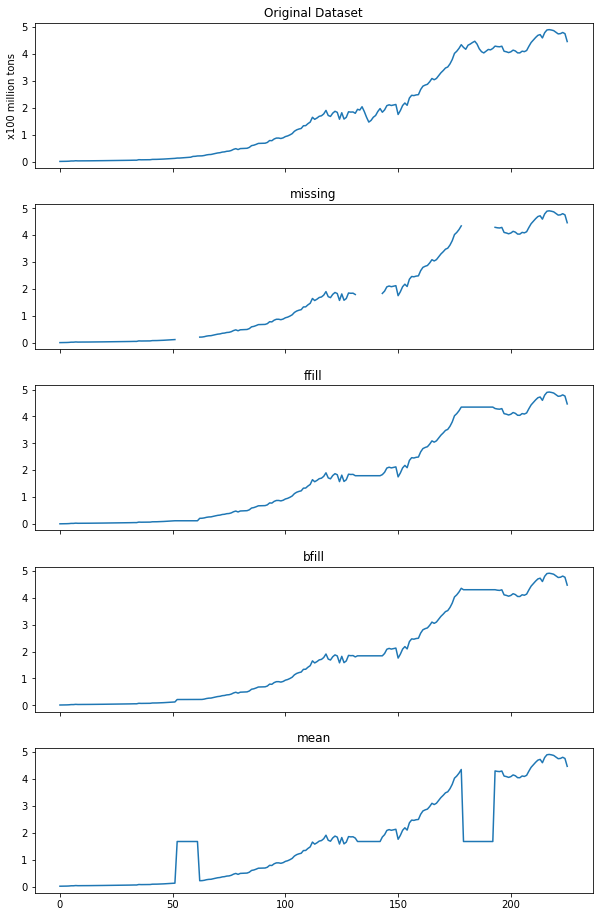

In [84]:
plot_dfs(co2_original, 
         co2_missing, 
         'co2',
         title="Annual CO2 Emission per Capita",
         xlabel="Years",
         ylabel="x100 million tons")

In [85]:
clicks_missing['ffil'] = clicks_missing['clicks'].fillna(method='ffill')
clicks_missing['bfill'] = clicks_missing['clicks'].fillna(method='bfill')
clicks_missing['mean'] = clicks_missing['clicks'].fillna(clicks_missing['clicks'].mean())

In [86]:
rmse_score(clicks_original, 
                    clicks_missing, 
                    'clicks')

RMSE for ffil: 1034.1210689204554
RMSE for bfill: 2116.6840489225033
RMSE for mean: 997.7600138929953


[1034.1210689204554, 2116.6840489225033, 997.7600138929953]

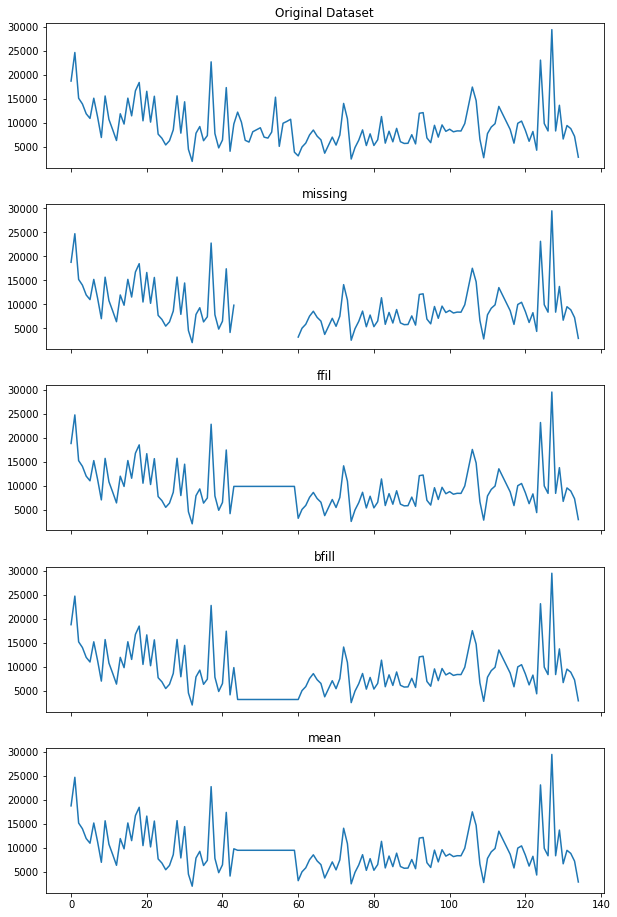

In [87]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

In [88]:
del co2_original,co2_missing,clicks_original,clicks_missing

### Handling Missing Data with univariate imputation using scikit-learn

It accepts different strategies,like: mean, median, most_frequent, and constant

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [89]:
from sklearn.impute import SimpleImputer

In [90]:
#Loading Data

URL1 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/co2_original.csv"
response = request.urlretrieve(URL1, r".//Data/co2_original.csv")
co2_or = Path(r".//Data/co2_original.csv")
co2_original = pd.read_csv(co2_or)

URL2 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/co2_missing_only.csv"
response = request.urlretrieve(URL2, r".//Data/co2_missing_only.csv")
co2_mis = Path(r".//Data/co2_missing_only.csv")
co2_missing = pd.read_csv(co2_mis)

URL3 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/clicks_original.csv"
response = request.urlretrieve(URL3, r".//Data/clicks_original.csv")
clicks_or= Path(r".//Data/clicks_original.csv")
clicks_original = pd.read_csv(clicks_or)

URL4 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/clicks_missing.csv"
response = request.urlretrieve(URL4, r".//Data/clicks_missing.csv")
clicks_mis= Path(r".//Data/clicks_missing.csv")
clicks_missing = pd.read_csv(clicks_mis)

In [91]:
strategy = [
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]

In [92]:
# Simple imputer accepts a numpy array, so it has to be reshaped: from (226, ) to (226,1) - column vector
display(co2_missing['co2'].shape)
display(co2_missing['co2'].values.reshape(-1,1).shape)

(226,)

(226, 1)

In [93]:
co2_vals = co2_missing['co2'].values.reshape(-1,1)
clicks_vals = clicks_missing['clicks'].values.reshape(-1,1)

for s_name, s in strategy:
    co2_missing[s_name] = (
        SimpleImputer(strategy=s).fit_transform(co2_vals))
    clicks_missing[s_name] = (
        SimpleImputer(strategy=s).fit_transform(clicks_vals))



RMSE for Mean Strategy: 0.7156383637041684
RMSE for Median Strategy: 0.802942160685986
RMSE for Most Frequent Strategy: 1.1245663822743381


[0.7156383637041684, 0.802942160685986, 1.1245663822743381]

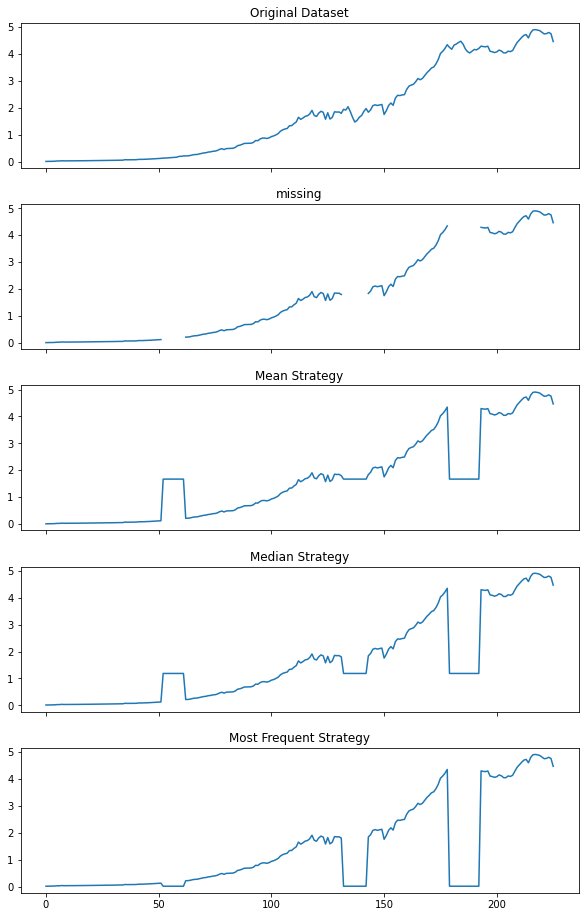

In [94]:
display(rmse_score(co2_original, co2_missing, 'co2'))
plot_dfs(co2_original, co2_missing, 'co2')

RMSE for Mean Strategy: 997.7600138929953
RMSE for Median Strategy: 959.3580492530756
RMSE for Most Frequent Strategy: 1097.6425985146868


[997.7600138929953, 959.3580492530756, 1097.6425985146868]

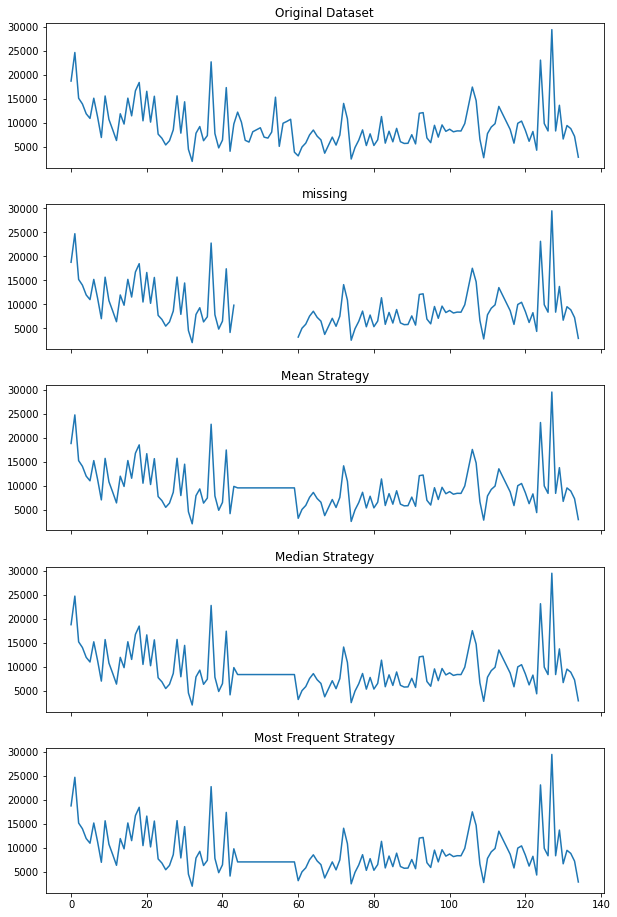

In [95]:
display(rmse_score(clicks_original, clicks_missing, 'clicks'))
plot_dfs(clicks_original, clicks_missing, 'clicks')

#### Simplifying Handling Missing Data with univariate imputation using fillna:

Given a dataframe with many columns that have missing values. The aim is to input these values with the mean:

**df.fillna(df.mean())**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

In [96]:
del co2_original,co2_missing,clicks_original,clicks_missing

### Handling Missing Data with Multivariate Imputation

Take advantage of other variables to imporve the predictability of missing values

https://www.jstatsoft.org/article/view/v045i03

https://bobrupakroy.medium.com/extra-trees-classifier-regressor-5b5f6abe8228

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

In [97]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor

In [98]:
#Loading Data

URL3 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/clicks_original.csv"
response = request.urlretrieve(URL3, r".//Data/clicks_original.csv")
clicks_or= Path(r".//Data/clicks_original.csv")
clicks_original = pd.read_csv(clicks_or,index_col='date',parse_dates=['date'])

URL4 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/clicks_missing.csv"
response = request.urlretrieve(URL4, r".//Data/clicks_missing.csv")
clicks_mis= Path(r".//Data/clicks_missing.csv")
clicks_missing = pd.read_csv(clicks_mis,index_col='date', parse_dates=['date'])

In [99]:
display(clicks_original.head())
display(clicks_missing.head())

,price,location,clicks
date,,,
2008-04-01,43.155647,2,18784
2008-04-02,43.079056,1,24738
2008-04-03,43.842609,2,15209
2008-04-04,43.312376,1,14018
2008-04-05,43.941176,1,11974


,price,location,clicks
date,,,
2008-04-01,43.155647,2,18784.0
2008-04-02,43.079056,1,24738.0
2008-04-03,43.842609,2,15209.0
2008-04-04,43.312376,1,14018.0
2008-04-05,43.941176,1,11974.0


### Testing with different estimators

'bayesianRidge' https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html

'extra_trees' https://bobrupakroy.medium.com/extra-trees-classifier-regressor-5b5f6abe8228
https://machinelearningmastery.com/extra-trees-ensemble-with-python/

'bagging' https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

'elastic_net' https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

'linear_regression' (OLS) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

'knn' https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [100]:
estimators = [
    ('bayesianRidge', BayesianRidge()),
    ('extra_trees', ExtraTreesRegressor(n_estimators=10)),
    ('bagging', BaggingRegressor(n_estimators=10)),
    ('elastic_net', ElasticNet()),
    ('linear_regression', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=3))
]


clicks_vals = clicks_missing.iloc[:,0:3].values

for e_name, e in estimators:
    est = IterativeImputer(
                random_state=15,
                estimator=e).fit(clicks_vals)
    clicks_missing[e_name] = est.transform(clicks_vals)[: , 2]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [101]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for bayesianRidge: 949.4393973455849
RMSE for extra_trees: 1814.3789090362452
RMSE for bagging: 1258.2949957073747
RMSE for elastic_net: 945.4075209343101
RMSE for linear_regression: 938.9419831427183
RMSE for knn: 1336.8798392251822


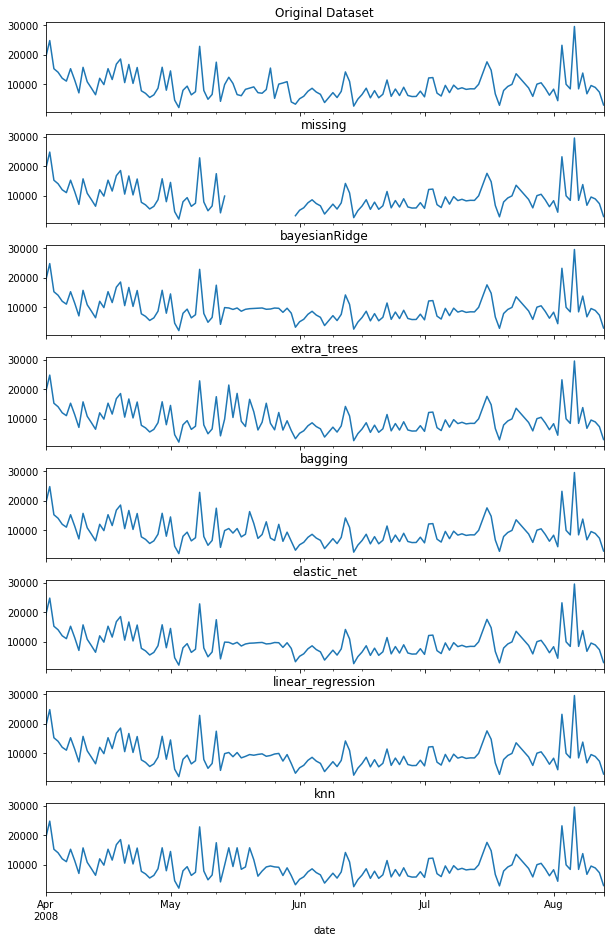

In [102]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

#### Mice algorithm

statsmodel has an implementation that is closer to MICE implementation in R

https://www.statsmodels.org/dev/generated/statsmodels.imputation.mice.MICEData.html
https://www.britannica.com/science/perturbation-mathematics


In [103]:
from statsmodels.imputation.mice import MICE, MICEData, MICEResults
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [104]:
# create a MICEData object
fltr = ['price', 'location','clicks']
mice_data = MICEData(clicks_missing[fltr], 
                     perturbation_method='gaussian')

#perturbation, in mathematics, 
# method for solving a problem by comparing it with a similar one for which the solution is known.
# https://www.britannica.com/science/perturbation-mathematics
# Allowed perturbation methods are ‘gaussian’ (the model parameters are set to a draw from the 
# Gaussian approximation to the posterior distribution), and ‘boot’ (the model parameters are set 
# to the estimated values obtained when fitting a bootstrapped version of the data set).
#https://www.statsmodels.org/dev/generated/statsmodels.imputation.mice.MICEData.html

# 20 iterations
mice_data.update_all(n_iter=20)

mice_data.set_imputer('clicks', formula='~ price + location', model_class=sm.OLS)

clicks_missing['MICE']  = mice_data.data['clicks'].values.tolist()

In [105]:
clicks_missing[clicks_missing['clicks'].isnull()]

,price,location,clicks,bayesianRidge,extra_trees,bagging,elastic_net,linear_regression,knn,MICE
date,,,,,,,,,,
2008-05-15,42.517755,2,NaN,9707.525780,21373.6,10547.1,9765.643101,10220.835135,15706.666667,7790.0
2008-05-16,44.011009,2,NaN,9216.858941,10381.9,9001.3,9155.883225,8791.484667,9362.333333,5410.0
2008-05-17,42.530303,2,NaN,9703.402594,18540.8,10547.1,9760.519148,10208.823974,15706.666667,5822.0
2008-05-18,42.565698,5,NaN,8607.827044,9085.7,7714.3,8518.905228,8400.360324,8428.000000,11904.0
2008-05-19,43.892996,2,NaN,9255.636726,7323.4,8614.7,9204.073027,8904.447357,9222.333333,15214.0
2008-05-20,43.247706,2,NaN,9467.671778,16538.3,16276.7,9467.572527,9522.121868,15706.333333,6237.0
2008-05-21,44.106289,1,NaN,9546.866124,12318.1,12281.3,9526.029958,9291.810227,11670.666667,5410.0
2008-05-22,43.810714,1,NaN,9643.988621,6153.0,7199.2,9646.725707,9574.735575,6098.666667,8537.0
2008-05-23,43.620802,1,NaN,9706.391787,8776.0,8517.3,9724.275164,9756.520825,7830.666667,8388.0


In [106]:
df_compare = clicks_missing
df_compare = pd.concat([df_compare,mice_data.data.loc['2008-05-10':'2008-05-30',['price','location','clicks']]])

display(clicks_missing.loc['2008-05-10':'2008-05-30',['price','location','clicks']])

display(df_compare.loc['2008-05-10':'2008-05-30',:])
del df_compare

,price,location,clicks
date,,,
2008-05-10,42.576299,1,4863.0
2008-05-11,43.405890,5,6511.0
2008-05-12,43.258326,2,17426.0
2008-05-13,42.714479,2,4160.0
2008-05-14,43.372786,5,9841.0
2008-05-15,42.517755,2,NaN
2008-05-16,44.011009,2,NaN
2008-05-17,42.530303,2,NaN
2008-05-18,42.565698,5,NaN


,price,location,clicks,bayesianRidge,extra_trees,bagging,elastic_net,linear_regression,knn,MICE
2008-05-10,42.576299,1,4863.0,4863.000000,4863.0,4863.0,4863.000000,4863.000000,4863.000000,4863.0
2008-05-11,43.405890,5,6511.0,6511.000000,6511.0,6511.0,6511.000000,6511.000000,6511.000000,6511.0
2008-05-12,43.258326,2,17426.0,17426.000000,17426.0,17426.0,17426.000000,17426.000000,17426.000000,17426.0
2008-05-13,42.714479,2,4160.0,4160.000000,4160.0,4160.0,4160.000000,4160.000000,4160.000000,4160.0
2008-05-14,43.372786,5,9841.0,9841.000000,9841.0,9841.0,9841.000000,9841.000000,9841.000000,9841.0
2008-05-15,42.517755,2,NaN,9707.525780,21373.6,10547.1,9765.643101,10220.835135,15706.666667,7790.0
2008-05-16,44.011009,2,NaN,9216.858941,10381.9,9001.3,9155.883225,8791.484667,9362.333333,5410.0
2008-05-17,42.530303,2,NaN,9703.402594,18540.8,10547.1,9760.519148,10208.823974,15706.666667,5822.0
2008-05-18,42.565698,5,NaN,8607.827044,9085.7,7714.3,8518.905228,8400.360324,8428.000000,11904.0
2008-05-19,43.892996,2,NaN,9255.636726,7323.4,8614.7,9204.073027,8904.447357,9222.333333,15214.0


In [107]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for bayesianRidge: 949.4393973455849
RMSE for extra_trees: 1814.3789090362452
RMSE for bagging: 1258.2949957073747
RMSE for elastic_net: 945.4075209343101
RMSE for linear_regression: 938.9419831427183
RMSE for knn: 1336.8798392251822
RMSE for MICE: 2000.7837186684844


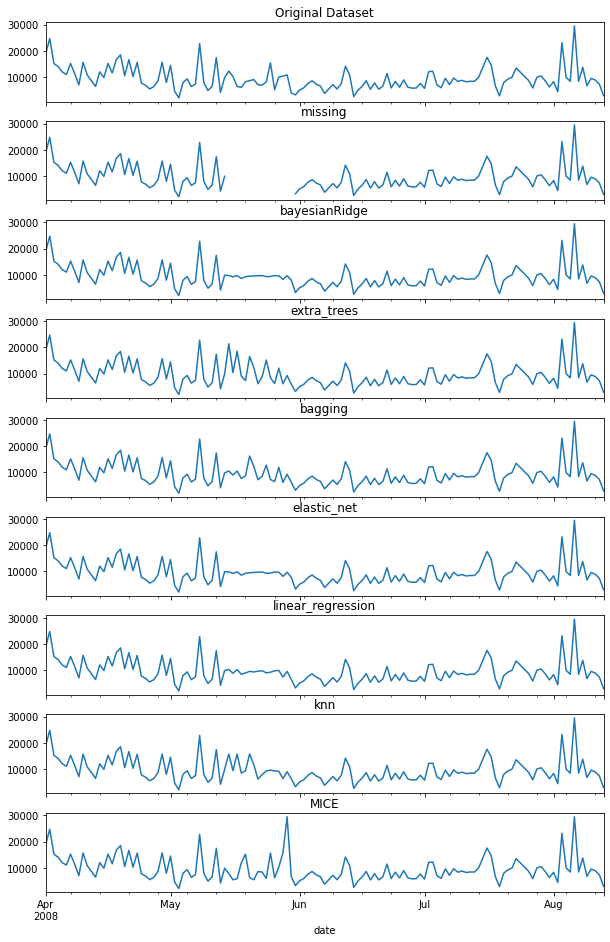

In [108]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

In [109]:
del clicks_missing, clicks_original

### Handling Missing Data with Interpolation

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [110]:
#Loading Data
co2_or = Path(r".//Data/co2_original.csv")
co2_original = pd.read_csv(co2_or)


co2_mis = Path(r".//Data/co2_missing_only.csv")
co2_missing = pd.read_csv(co2_mis)

URL3 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/clicks_original.csv"
response = request.urlretrieve(URL3, r".//Data/clicks_original.csv")
clicks_or= Path(r".//Data/clicks_original.csv")
clicks_original = pd.read_csv(clicks_or,index_col='date',parse_dates=['date'])

URL4 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch7/clicks_missing.csv"
response = request.urlretrieve(URL4, r".//Data/clicks_missing.csv")
clicks_mis= Path(r".//Data/clicks_missing.csv")
clicks_missing = pd.read_csv(clicks_mis,index_col='date', parse_dates=['date'])

In [111]:
interpolations = [('linear',None),
    ('quadratic',None),
    ('nearest',None),
    ('cubic',None),
    ('spline',3),
    ('polynomial',5)]

for intp,ori in interpolations:
    co2_missing[intp] = co2_missing['co2'].interpolate(method=intp,order=ori)
    clicks_missing[intp] = clicks_missing['clicks'].interpolate(method=intp,order=ori)


# co2_missing['spline'] = \
#         co2_missing['co2'].interpolate(method='spline', order=3)
# clicks_missing['spline'] = \
#         clicks_missing['clicks'].interpolate(method='spline',order=3)

# co2_missing['polynomial'] = \
#         co2_missing['co2'].interpolate(method='polynomial',order=3)
# clicks_missing['polynomial'] = \
#         clicks_missing['clicks'].interpolate(method='polynomial',order=3)

In [112]:
display(rmse_score(co2_original, co2_missing, 'co2'),'\n')
display(rmse_score(clicks_original, clicks_missing, 'clicks'))

RMSE for linear: 0.05507291327761665
RMSE for quadratic: 0.08379426414550524
RMSE for nearest: 0.05385422309469095
RMSE for cubic: 0.08386511852488955
RMSE for spline: 0.16858719078369636
RMSE for polynomial: 0.06730415133817551


[0.05507291327761665,
 0.08379426414550524,
 0.05385422309469095,
 0.08386511852488955,
 0.16858719078369636,
 0.06730415133817551]

'\n'

RMSE for linear: 1329.1448378562811
RMSE for quadratic: 5224.641260626974
RMSE for nearest: 1706.1853705030173
RMSE for cubic: 6199.304875782833
RMSE for spline: 6197.349119678481
RMSE for polynomial: 56757.29323647128


[1329.1448378562811,
 5224.641260626974,
 1706.1853705030173,
 6199.304875782833,
 6197.349119678481,
 56757.29323647128]

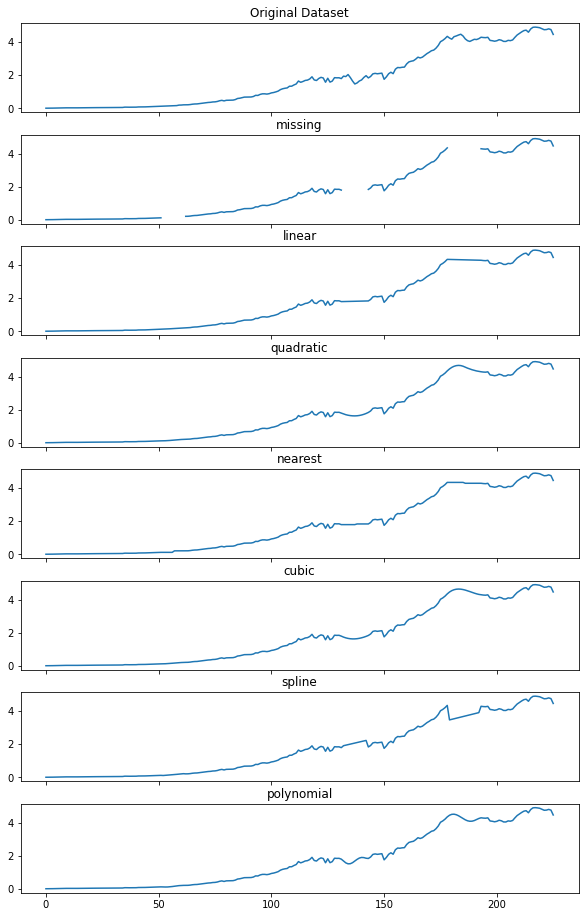

In [113]:
plot_dfs(co2_original, co2_missing, 'co2')

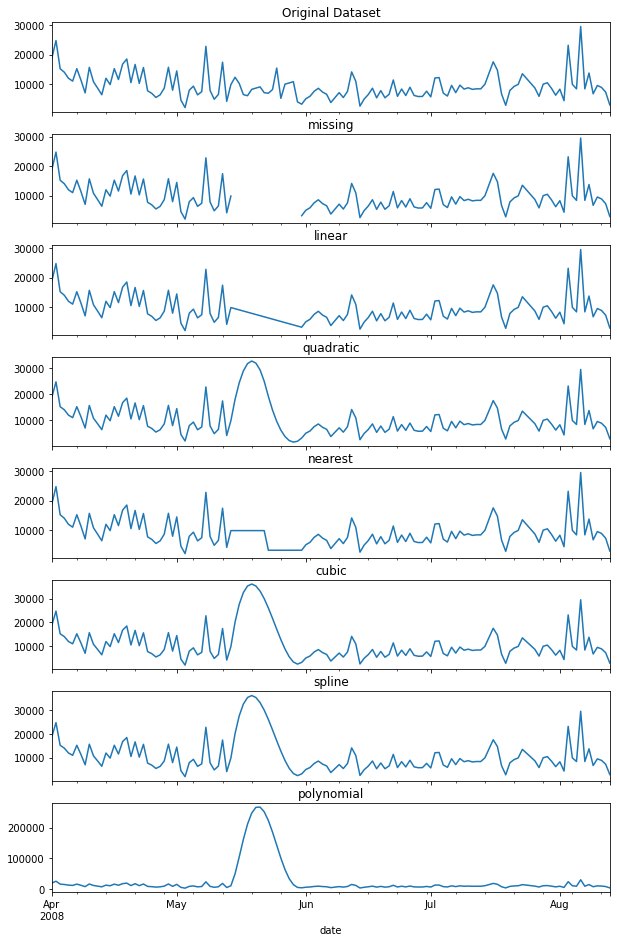

In [114]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

## Outlier Detection Using Statistical Methods

Outliers can be:
    - point outlier or global outlier(it deviates from the rest of the population)
    - collective outliers ( when a group don't follow the expected pattern)
    - context outlier (when regarded in a situation the pattern is not followed)

The treatment of outliers will also depend on the business context: keep them, categorize it, or replace them?

In [115]:
#loading data
URL4 = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch8/nyc_taxi.csv"
response = request.urlretrieve(URL4, r".//Data/nyc_taxi.csv")
nyc = Path(r".//Data/nyc_taxi.csv")
nyc_taxi = pd.read_csv(nyc,index_col='timestamp',parse_dates=True)

nyc_taxi.index.freq = '30T'

In [118]:
# ground truth labels
nyc_dates =  [
        "2014-11-01", # Before NY marathon
        "2014-11-27", # Thanksgiving
        "2014-12-25", # Christhmas
        "2015-01-01", # New Year's
        "2015-01-27" # North American Blizzard
]

<AxesSubplot:title={'center':'NYC Taxi'}, xlabel='timestamp'>

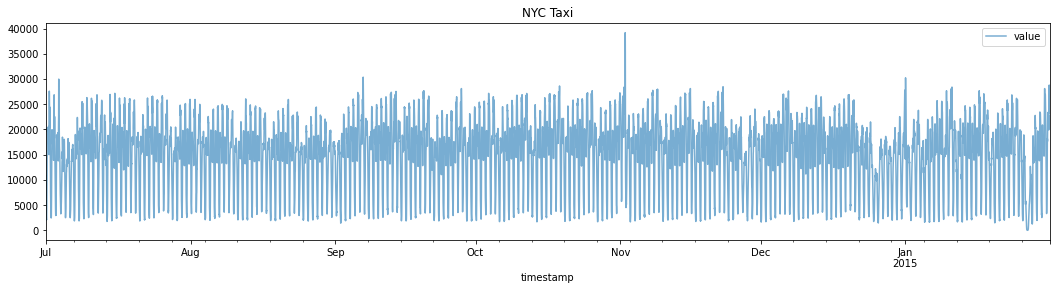

In [147]:
nyc_taxi.plot(title="NYC Taxi", alpha=0.6,figsize=(18,4))

In [153]:
#functions

def plot_outliers(outliers, data, method='KNN',
                 halignment = 'right', 
                 valignment = 'bottom',
                 labels=False):

    ax = data.plot(alpha=0.6,figsize=(18,4))
    
    if labels:
        for i in outliers['value'].items():
            plt.plot(i[0], i[1], 'rx')
            plt.text(i[0], i[1], f'{i[0].date()}', 
                         horizontalalignment=halignment,
                         verticalalignment=valignment)
    else:
        data.loc[outliers.index].plot(ax=ax, style='rx')
        
    plt.title(f'NYC Taxi - {method}')
    plt.xlabel('date'); plt.ylabel('# of passengers')
    plt.legend(['nyc taxi','outliers'])
    plt.show()

   


### Resampling

Changing the level of granurality ot frequency 

In [154]:
nyc_taxi.index

DatetimeIndex(['2014-07-01 00:00:00', '2014-07-01 00:30:00',
               '2014-07-01 01:00:00', '2014-07-01 01:30:00',
               '2014-07-01 02:00:00', '2014-07-01 02:30:00',
               '2014-07-01 03:00:00', '2014-07-01 03:30:00',
               '2014-07-01 04:00:00', '2014-07-01 04:30:00',
               ...
               '2015-01-31 19:00:00', '2015-01-31 19:30:00',
               '2015-01-31 20:00:00', '2015-01-31 20:30:00',
               '2015-01-31 21:00:00', '2015-01-31 21:30:00',
               '2015-01-31 22:00:00', '2015-01-31 22:30:00',
               '2015-01-31 23:00:00', '2015-01-31 23:30:00'],
              dtype='datetime64[ns]', name='timestamp', length=10320, freq='30T')

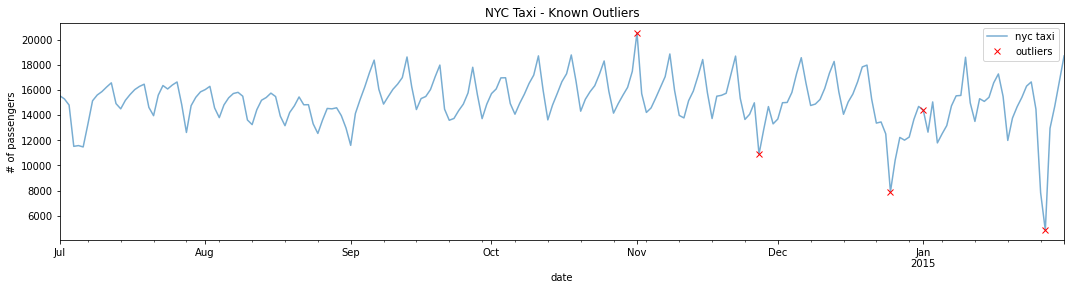

In [155]:
tx = nyc_taxi.resample('D').mean()

known_outliers = tx.loc[nyc_dates]
    
plot_outliers(known_outliers, tx, 'Known Outliers')

In [159]:
display(nyc_taxi.head())
display(nyc_taxi.resample('15T').mean().head())


,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


,value
timestamp,
2014-07-01 00:00:00,10844.0
2014-07-01 00:15:00,NaN
2014-07-01 00:30:00,8127.0
2014-07-01 00:45:00,NaN
2014-07-01 01:00:00,6210.0


In [160]:
# Imputing missing values
display(nyc_taxi.resample('15T').mean().head())
display(nyc_taxi.resample('15T').fillna('ffill').head())

,value
timestamp,
2014-07-01 00:00:00,10844.0
2014-07-01 00:15:00,NaN
2014-07-01 00:30:00,8127.0
2014-07-01 00:45:00,NaN
2014-07-01 01:00:00,6210.0


,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:15:00,10844
2014-07-01 00:30:00,8127
2014-07-01 00:45:00,8127
2014-07-01 01:00:00,6210


In [161]:
# When downsampling...
nyc_taxi.resample('MS').agg(['mean', 'min', 'max', 'median', 'sum'])

value                                
                    mean   min    max   median       sum
timestamp                                               
2014-07-01  14994.084677  1769  29985  16625.5  22311198
2014-08-01  14580.438844  1841  26062  16184.0  21695693
2014-09-01  15623.374306  1431  30373  17244.5  22497659
2014-10-01  16086.851478  1691  28626  17767.5  23937235
2014-11-01  15492.125000  1683  39197  17287.0  22308660
2014-12-01  14813.428763  1459  27804  16587.0  22042382
2015-01-01  14399.790995     8  30236  16061.0  21426889

## Detecting Outliers using Visualization

In [162]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

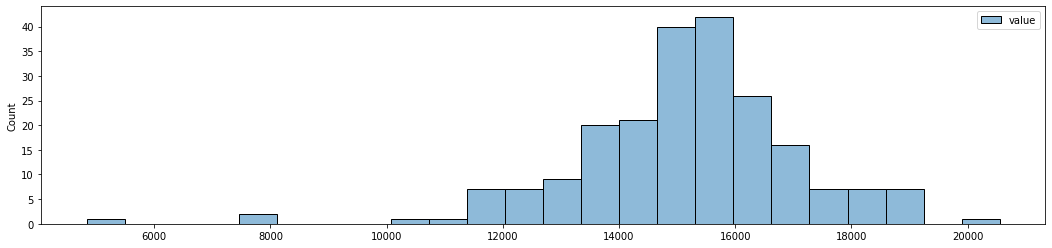

In [165]:
tx = nyc_taxi.resample('D').mean()
plt.figure(figsize=(18,4))
sns.histplot(tx)

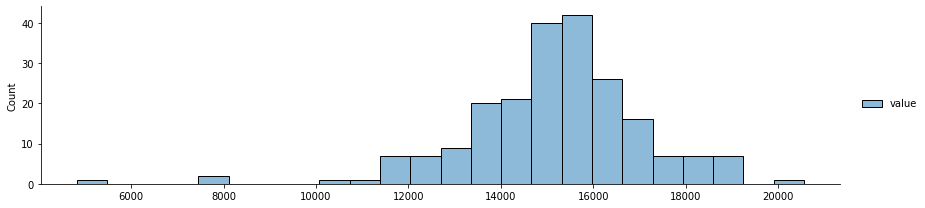

In [166]:
sns.displot(tx, kind='hist', height=3, aspect=4)

,value
count,215.000000
mean,15137.569380
std,1937.391020
min,4834.541667
25%,14205.197917
50%,15299.937500
75%,16209.427083
max,20553.500000


<AxesSubplot:>

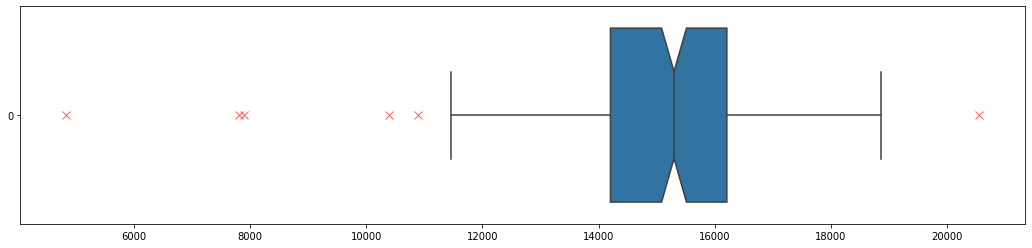

<AxesSubplot:>

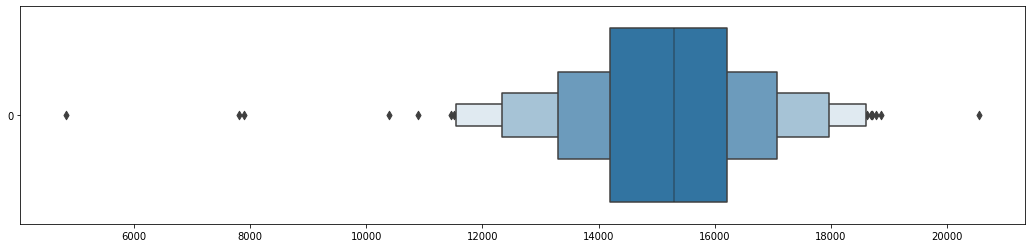

<AxesSubplot:>

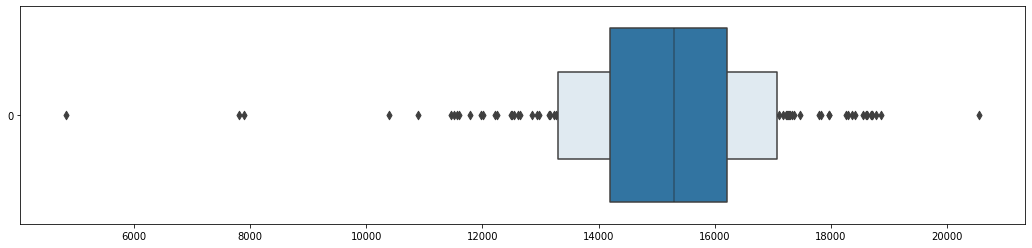

<AxesSubplot:>

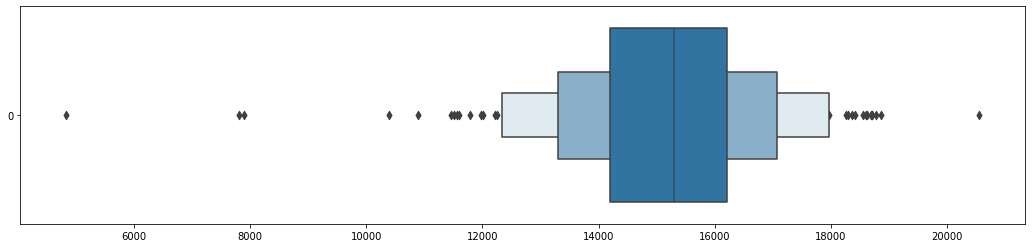

In [192]:
display(tx.describe())

# Lower fence = Q1 - (1.5 x IQR)
# Upper fence = Q3 + (1.5 x IQR)

plt.figure(figsize=(18,4))
display(sns.boxplot(data=tx['value'],orient='h', whis=1.5,fliersize=8,notch=True, flierprops={"marker": "x",'alpha':0.6, 
                                'markeredgecolor': 'red'}))
plt.show()

plt.figure(figsize=(18,4))
display(sns.boxenplot(data=tx['value'], orient='h'))
plt.show()

# changing depth with numeric value
plt.figure(figsize=(18,4))
display(sns.boxenplot(data=tx['value'], k_depth=2, orient='h'))
plt.show()
#k_depth='tukey' or numeric
# The number of boxes, and by extension number of percentiles, to draw. 
# All methods are detailed in Wickham’s paper. Each makes different assumptions
# about the number of outliers and leverages different statistical properties. 
# If “proportion”, draw no more than outlier_prop extreme observations. If “full”, draw log(n)+1 boxes.
# Paper: https://vita.had.co.nz/papers/letter-value-plot.html
# https://seaborn.pydata.org/generated/seaborn.boxenplot.html

plt.figure(figsize=(18,4))
display(sns.boxenplot(data=tx['value'], k_depth=3, orient='h'))
plt.show()

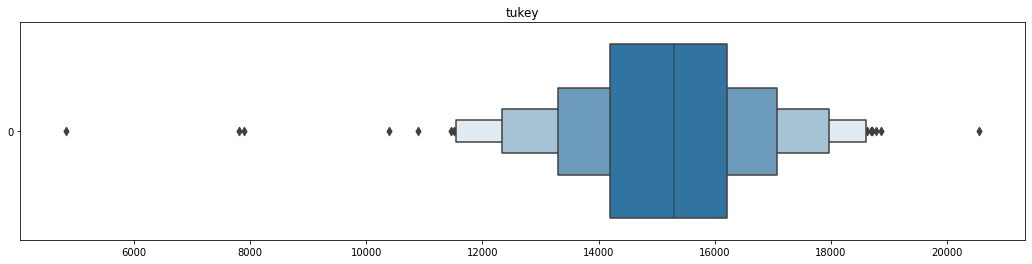

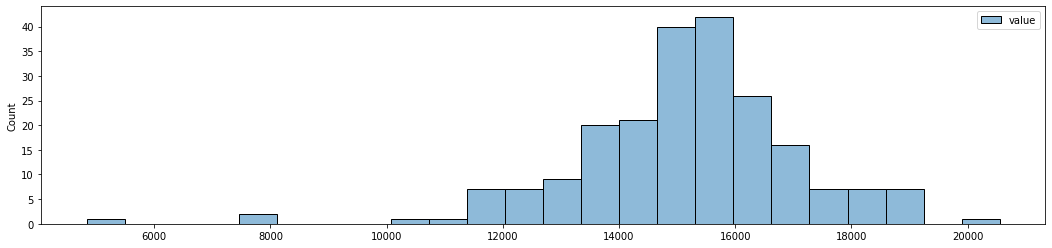

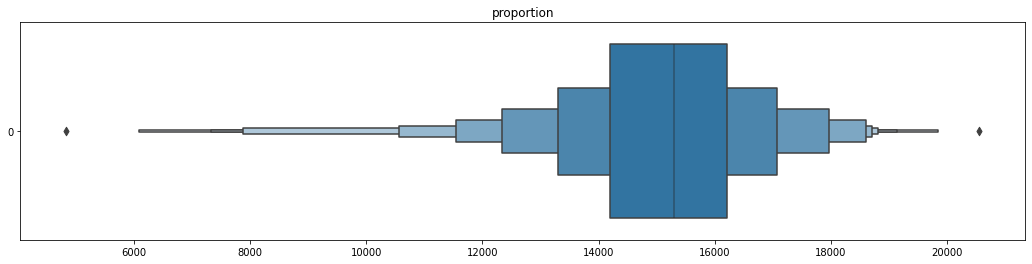

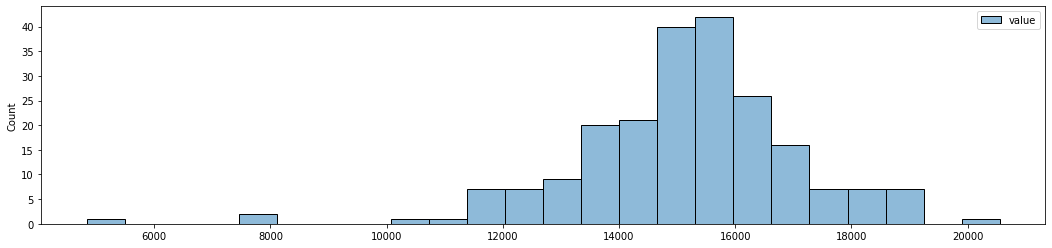

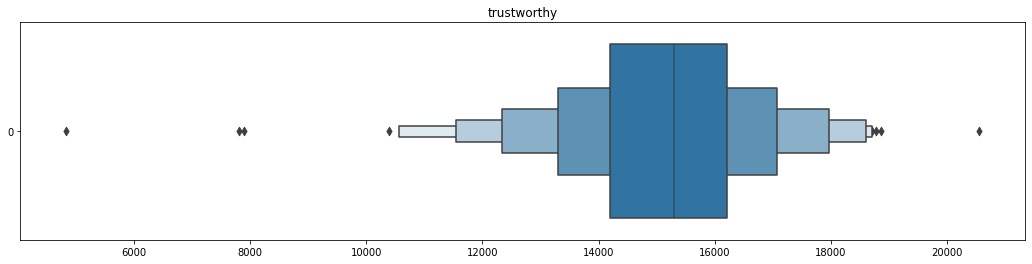

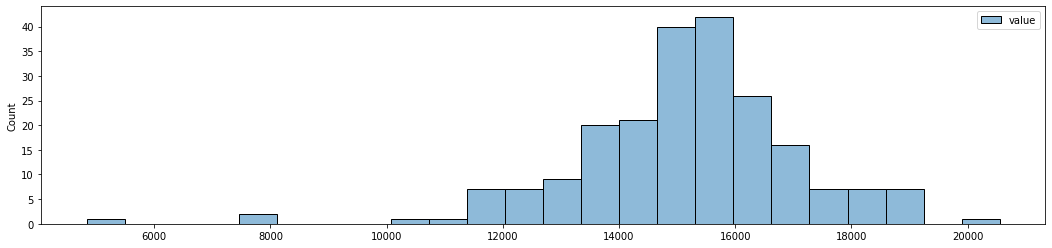

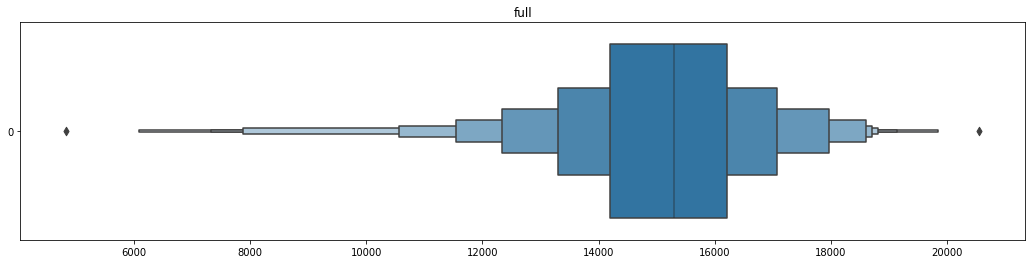

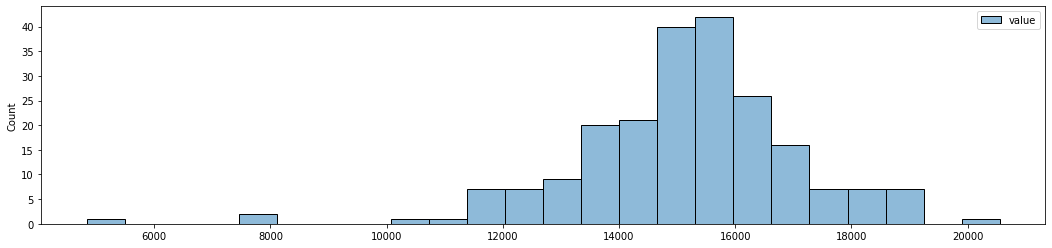

In [200]:
# exploring different methods 
for k in ["tukey", "proportion", "trustworthy", "full"]:
    plt.figure(figsize=(18,4))
    sns.boxenplot(data=tx['value'], k_depth=k, orient='h')
    plt.title(k)
    plt.figure(figsize=(18,4))
    sns.histplot(tx)
    plt.show()
    

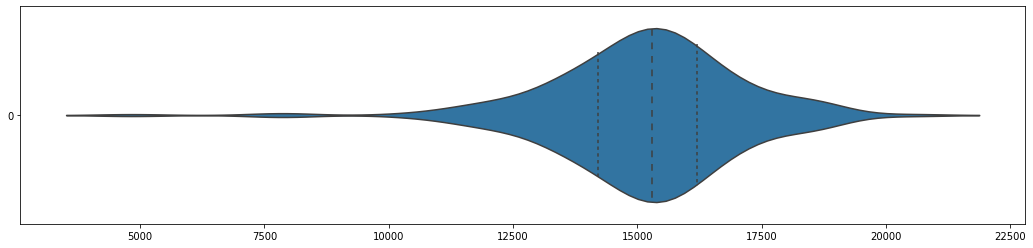

In [203]:
plt.figure(figsize=(18,4))
sns.violinplot(data=tx['value'], inner='quartile', orient='h')
plt.show()



### Lag Plot

Useful for spotting outliers. The same as:

y = tx[1:].values.reshape(-1)

x = tx[:-1].values.reshape(-1)

sns.scatterplot(x=x, y=y)



<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

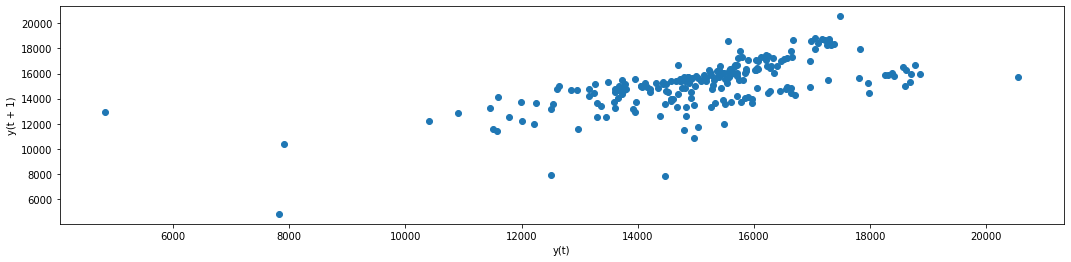

In [216]:
from pandas.plotting import lag_plot
plt.figure(figsize=(18,4))
lag_plot(tx, lag=1)

## Detecting Outliers using Tukey’s Method

In [210]:
def iqr_outliers(data,whis=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (whis * IQR)
    upper_fence = q3 + (whis * IQR)
    return data[(data.value > upper_fence) | (data.value < lower_fence)]

In [211]:
outliers = iqr_outliers(tx)
print(outliers)

                   value
timestamp               
2014-11-01  20553.500000
2014-11-27  10899.666667
2014-12-25   7902.125000
2014-12-26  10397.958333
2015-01-26   7818.979167
2015-01-27   4834.541667


In [213]:
known_outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2015-01-01,14383.479167
2015-01-27,4834.541667


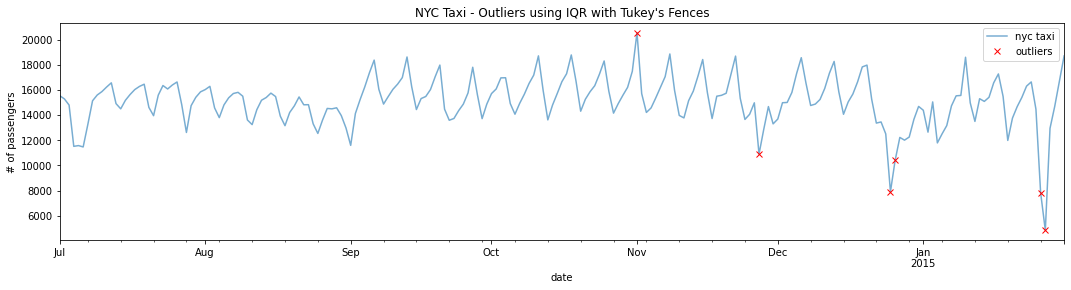

None

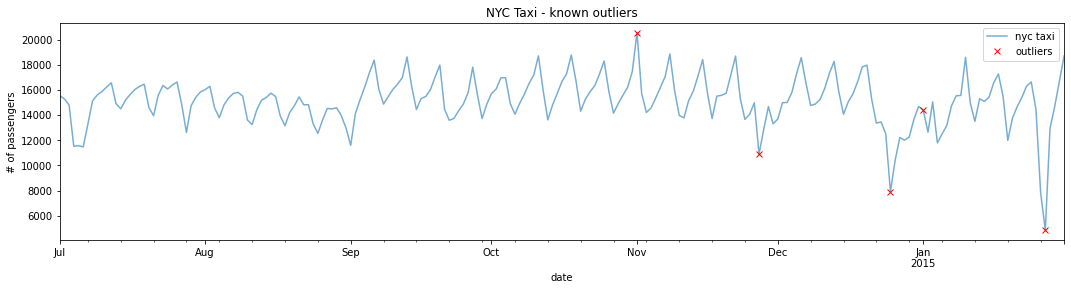

None

In [214]:
display(plot_outliers(outliers, tx, "Outliers using IQR with Tukey's Fences"))
display(plot_outliers(known_outliers, tx, "known outliers")



     
)

## Detecting Outliers with Z-score